## Installation

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt

e:\Kuliah\Kuliah\Semester 6\Riset\crowd-detection-tult\yolov5


Cloning into 'yolov5'...
C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\IPython\core\magics\osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


  Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.1.1-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.2
    Uninstalling numpy-2.2.2:
      Successfully uninstalled numpy-2.2.2
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
easyocr 1.7.2 requires opencv-python-headless, which is not installed.

[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import torch
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2025-5-1 Python-3.12.5 torch-2.6.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


In [9]:
cap = cv2.VideoCapture('E:/Kuliah/Kuliah/Semester 6/Riset/crowd-detection-tult/video/test.mp4')

In [ ]:
ret, frame = cap.read()
if ret:
	results = model(frame)
else:
	print("Failed")

C:\Users\ASUS/.cache\torch\hub\ultralytics_yolov5_master\models\common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


image 1/1: 478x848 7 persons, 2 backpacks, 1 handbag, 1 refrigerator
Speed: 2.0ms pre-process, 99.4ms inference, 1.4ms NMS per image at shape (1, 3, 384, 640)


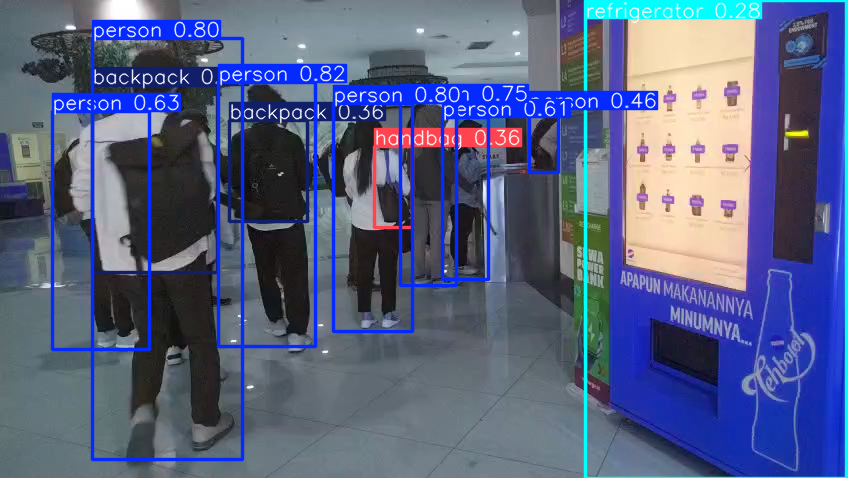

In [ ]:
if 'results' in locals():
	results.print()  # summary
	results.show()   # tampilkan gambar dengan bbox
else:
	print("Error")

In [12]:
results.render()  # hasil render akan mengubah frame asli di-place
frame_with_box = results.ims[0]  # hasilnya array numpy

In [ ]:
cv2.imshow("Deteksi Orang", frame_with_box)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    results = model(frame)
    results.render()
    frame = results.ims[0]

    cv2.imshow("Deteksi Orang", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

In [ ]:
# break window
cap.release()
cv2.destroyAllWindows()